# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [14]:
A + B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [15]:
A * B

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [24]:
A.dot(C)

ValueError: shapes (2,3) and (6,2) not aligned: 3 (dim 1) != 6 (dim 0)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

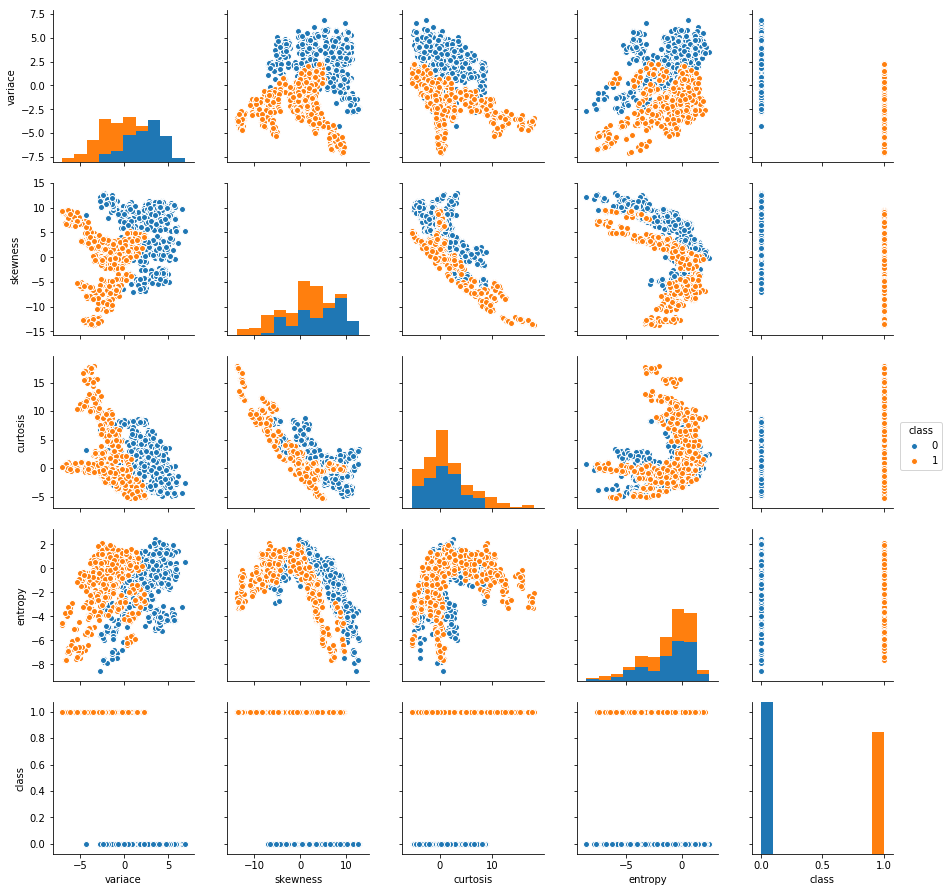

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [32]:
# Scale to 0 as mean and 1 as std
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [33]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.98905908,  0.99562363])

### Logistic Regression Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [35]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [36]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 1.2861 - acc: 0.3771     
Epoch 2/10
960/960 [==============================] - 0s - loss: 1.1200 - acc: 0.3917     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.9763 - acc: 0.4125     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.8572 - acc: 0.4354     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.7624 - acc: 0.4760     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.6888 - acc: 0.5385     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.6322 - acc: 0.6302     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.5883 - acc: 0.7333     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.5537 - acc: 0.7854     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [37]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [41]:
history.history

{'acc': [0.37708333333333333,
  0.39166666666666666,
  0.41249999999999998,
  0.43541666666666667,
  0.47604166666666664,
  0.5385416666666667,
  0.63020833333333337,
  0.73333333333333328,
  0.78541666666666665,
  0.80729166666666663],
 'loss': [1.2860696911811829,
  1.1200428565343221,
  0.97633738915125534,
  0.85722768902778623,
  0.76238880554834998,
  0.68883804678916927,
  0.63222956061363222,
  0.58826016783714297,
  0.5536648948987325,
  0.5256742119789124]}

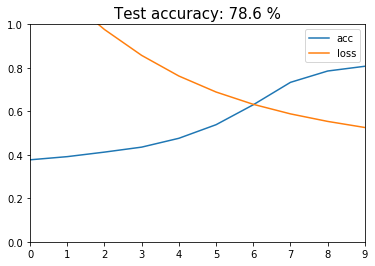

In [38]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [42]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [43]:
historydf = pd.concat(dflist, axis=1)

In [44]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.296875,1.177586,0.865625,0.421469,0.882292,0.371179,0.882292,0.309616
1,0.367708,0.908969,0.946875,0.283188,0.923958,0.269276,0.965625,0.129389
2,0.546875,0.718491,0.953125,0.241941,0.941667,0.217742,0.975000,0.096442
3,0.765625,0.591600,0.958333,0.216659,0.955208,0.184874,0.976042,0.080395
4,0.916667,0.507811,0.961458,0.197804,0.960417,0.162198,0.979167,0.071208
5,0.937500,0.450843,0.961458,0.182807,0.964583,0.145531,0.980208,0.065353
6,0.942708,0.410192,0.963542,0.170471,0.967708,0.132791,0.980208,0.060999
7,0.942708,0.379746,0.964583,0.160149,0.968750,0.122847,0.980208,0.057467
8,0.941667,0.355999,0.965625,0.151373,0.969792,0.114718,0.981250,0.055130
9,0.940625,0.336824,0.967708,0.143764,0.970833,0.108166,0.981250,0.052739


In [45]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [46]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.296875  1.177586  0.865625  0.421469  0.882292  0.371179   
1              0.367708  0.908969  0.946875  0.283188  0.923958  0.269276   
2              0.546875  0.718491  0.953125  0.241941  0.941667  0.217742   
3              0.765625  0.591600  0.958333  0.216659  0.955208  0.184874   
4              0.916667  0.507811  0.961458  0.197804  0.960417  0.162198   
5              0.937500  0.450843  0.961458  0.182807  0.964583  0.145531   
6              0.942708  0.410192  0.963542  0.170471  0.967708  0.132791   
7              0.942708  0.379746  0.964583  0.160149  0.968750  0.122847   
8              0.941667  0.355999  0.965625  0.151373  0.969792  0.114718   
9              0.940625  0.336824  0.967708  0.143764  0.970833  0.108166   

learning_rate      0.50            
metric              acc      loss  
0              0.882292  0.309616  
1              0.965625  0.129389  
2              0.975000  0.096442  
3              0.976042  0.080395  
4              0.979167  0.071208  
5              0.980208  0.065353  
6              0.980208  0.060999  
7              0.980208  0.057467  
8              0.981250  0.055130  
9              0.981250  0.052739

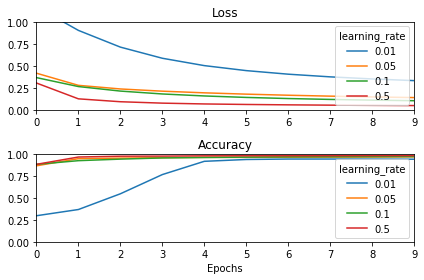

In [47]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [52]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [53]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [54]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.452083  0.869293  0.630208  0.643404  0.508333  0.888564   
1           0.567708  0.685345  0.709375  0.607688  0.528125  0.850843   
2           0.695833  0.569246  0.751042  0.577322  0.542708  0.815147   
3           0.810417  0.495149  0.783333  0.551173  0.560417  0.781456   
4           0.873958  0.444757  0.807292  0.528380  0.569792  0.749694   
5           0.893750  0.408267  0.810417  0.508268  0.584375  0.719748   
6           0.907292  0.380349  0.818750  0.490345  0.593750  0.691638   
7           0.911458  0.357973  0.827083  0.474239  0.611458  0.665184   
8           0.916667  0.339419  0.832292  0.459685  0.625000  0.640419   
9           0.928125  0.323651  0.845833  0.446414  0.638542  0.617239   

batch_size       128            
metric           acc      loss  
0           0.447917  0.917620  
1           0.457292  0.897509  
2           0.464583  0.878405  
3           0.473958  0.860284  
4           0.479167  0.842716  
5           0.491667  0.826367  
6           0.498958  0.810858  
7           0.502083  0.795997  
8           0.508333  0.781784  
9           0.512500  0.768398

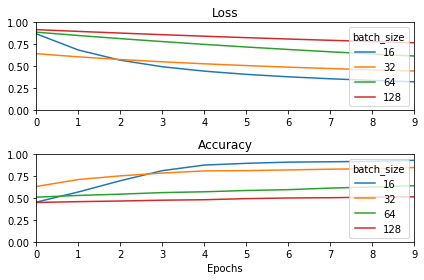

In [55]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [56]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [57]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [58]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

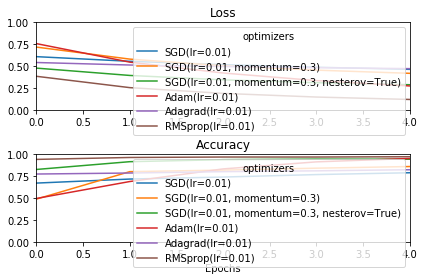

In [59]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [60]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [61]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

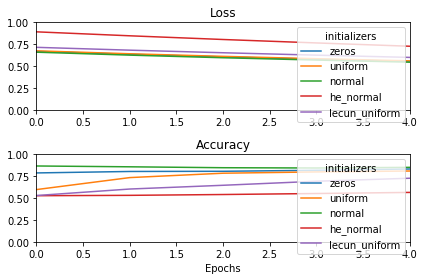

In [62]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [78]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.7551 - acc: 0.4301 - val_loss: 0.6915 - val_acc: 0.5174
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.6041 - acc: 0.6741 - val_loss: 0.5258 - val_acc: 0.7292
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.4187 - acc: 0.7872 - val_loss: 0.3686 - val_acc: 0.8160
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.2822 - acc: 0.8720 - val_loss: 0.2277 - val_acc: 0.9097
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.1815 - acc: 0.9241 - val_loss: 0.1408 - val_acc: 0.9479
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.1166 - acc: 0.9524 - val_loss: 0.0836 - val_acc: 0.9722
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0764 - acc: 0.9673 - val_loss: 0.0541 - val_acc: 0.9826
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0546 - acc: 0.9792 - val_l

In [79]:
result

[0.027015933292257845, 0.98786407766990292]

In [80]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.layers

In [82]:
inp = model.layers[0].input
out = model.layers[0].output

In [83]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [84]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [85]:
features_function = K.function([inp], [out])

In [86]:
features_function

In [87]:
features_function([X_test])[0].shape

(412, 2)

In [88]:
features = features_function([X_test])[0]

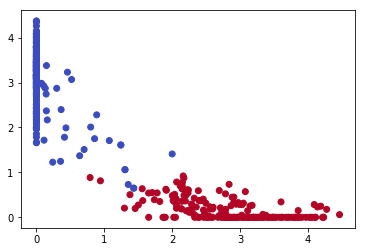

In [89]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [90]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

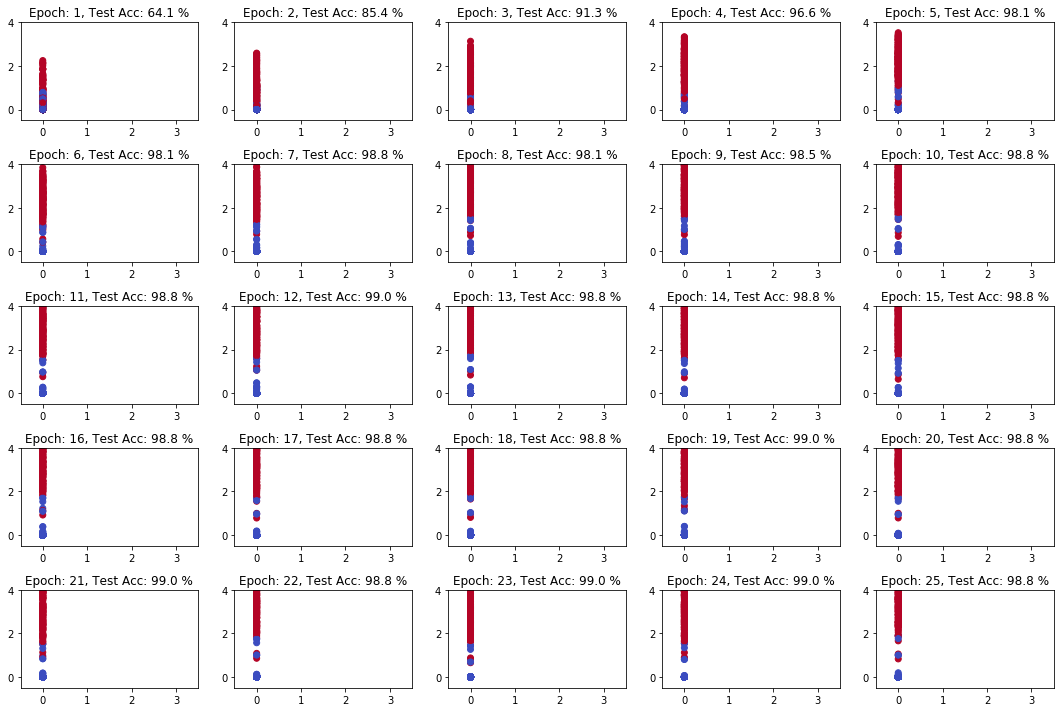

In [91]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard